### 미국 캘리포니아 주의 주택 가격
- 주택 가격을 회귀분석하여 예측하자.

In [1]:
import pandas as pd

h_df = pd.read_csv('./datasets/1553768847-housing.csv')
h_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [2]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [3]:
h_df.duplicated().sum()

0

In [4]:
h_df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
drop_index = h_df[h_df.ocean_proximity == 'ISLAND'].index

In [6]:
h_df = h_df.drop(index=drop_index, axis=0).reset_index(drop=True)

In [7]:
h_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20630,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20631,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20632,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20633,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [8]:
h_df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

pre_h_df = h_df.copy()

encoder = LabelEncoder()
result = encoder.fit_transform(pre_h_df.ocean_proximity)
pre_h_df['ocean_proximity'] = result

In [10]:
pre_h_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,2,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,2,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,2,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,2,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,2,342200
...,...,...,...,...,...,...,...,...,...,...
20630,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100
20631,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100
20632,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300
20633,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700


In [11]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    #MSLE = mean_squared_log_error(y_test, prediction)
    #RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation_msle(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [13]:
pre_h_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [14]:
pre_h_df = pre_h_df[~pre_h_df['total_bedrooms'].isna()]
pre_h_df = pre_h_df.reset_index(drop=True)
pre_h_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,2,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,2,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,2,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,2,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,2,342200
...,...,...,...,...,...,...,...,...,...,...
20423,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100
20424,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100
20425,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300
20426,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700


Cycle 1 에 훈련후 판단

### Cycle 1

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [16]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 3525584952.0297, RMSE: 59376.6364, R2: 0.7371


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 4619391415.1189, RMSE: 67966.1049, R2: 0.6555
RandomForestRegressor
MSE: 2264422365.5792, RMSE: 47585.9471, R2: 0.8311
GradientBoostingRegressor
MSE: 3009229082.5028, RMSE: 54856.4407, R2: 0.7756
XGBRegressor
MSE: 2219623519.6393, RMSE: 47112.8806, R2: 0.8345
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1842
[LightGBM] [Info] Number of data points in the train set: 16342, number of used features: 9
[LightGBM] [Info] Start training from score 206684.344756
LGBMRegressor
MSE: 2148165536.7313, RMSE: 46348.3067, R2: 0.8398


In [18]:
corr = pre_h_df.corr()
corr['median_house_value'].sort_values(ascending=False)[1:]

median_income         0.688848
total_rooms           0.133516
housing_median_age    0.106077
households            0.065122
total_bedrooms        0.049792
ocean_proximity       0.015981
population           -0.025069
longitude            -0.045642
latitude             -0.144312
Name: median_house_value, dtype: float64

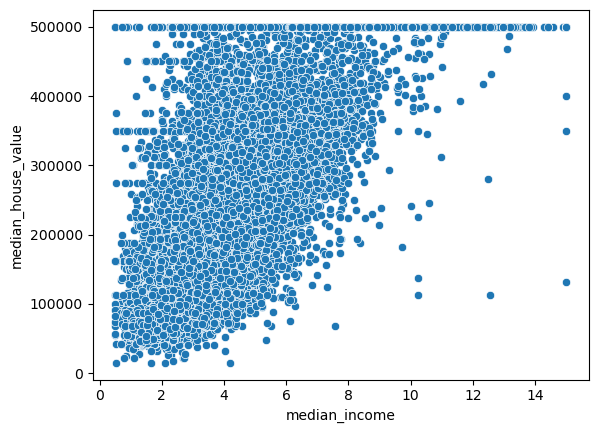

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x= 'median_income', y='median_house_value', data=pre_h_df)
plt.show()

corr가 가장 큰 타겟과 확인한 결과, 선형 데이터에 가까운 것으로 판단할 수 있었다.

### Cycle 2
- hist plot을 확인
- 타겟분포 맞춰주기

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

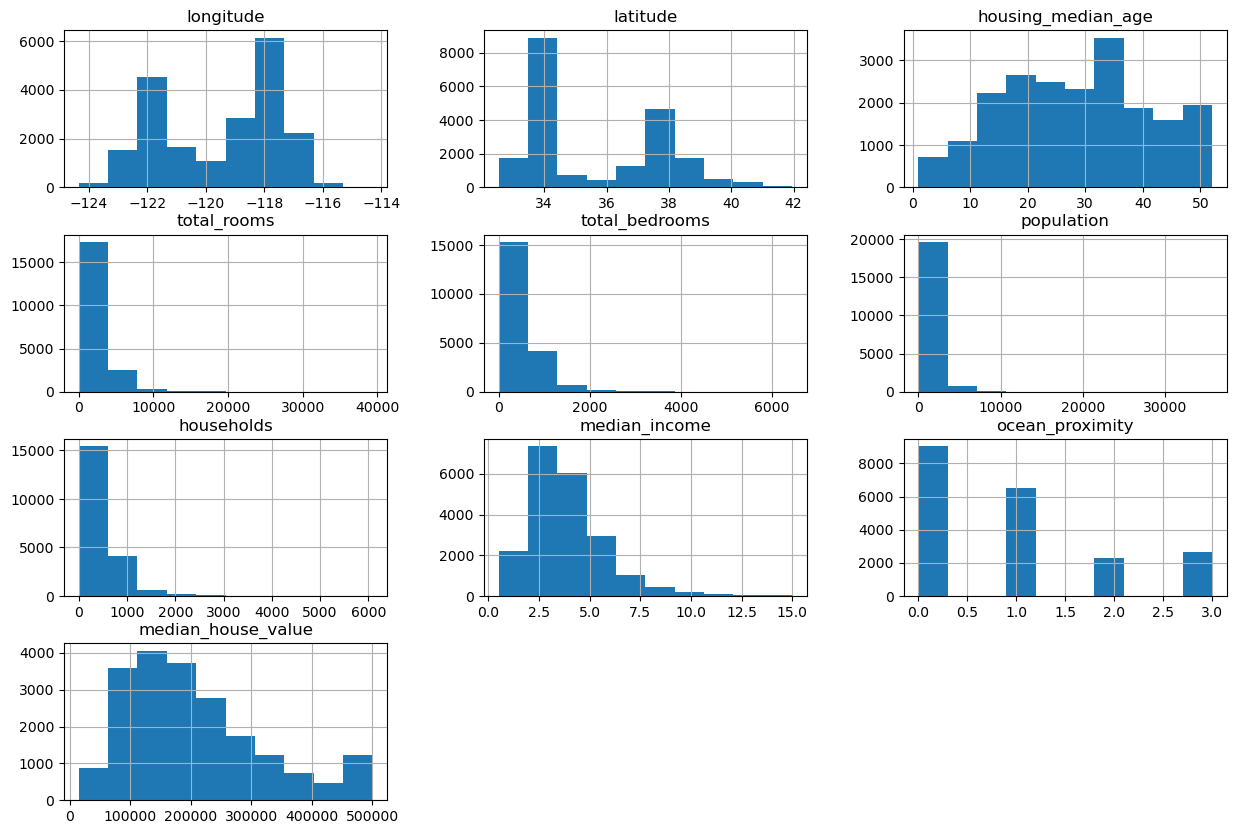

In [20]:
pre_h_df.hist(figsize=(15,10))

<Axes: >

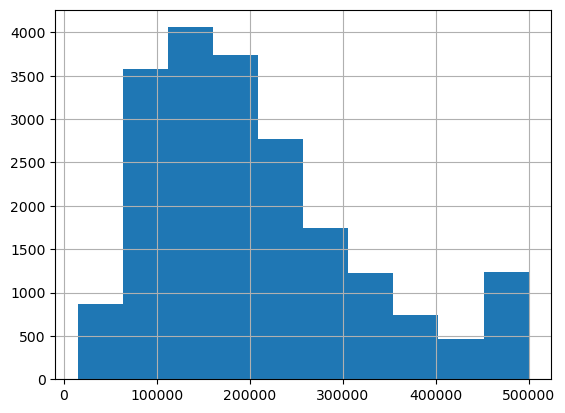

In [21]:
pre_h_df.median_house_value.hist()

In [22]:
from sklearn.preprocessing import PowerTransformer

ptf = PowerTransformer(standardize=False)
result = ptf.fit_transform(pre_h_df[['median_house_value']])
pre_h_df['Target_yeo'] = result
pre_h_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,Target_yeo
0,-122.23,37.88,41,880,129.0,322,126,8.3252,2,452600,32.502462
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,2,358500,31.346047
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,2,352100,31.258059
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,2,341300,31.106351
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,2,342200,31.119153
...,...,...,...,...,...,...,...,...,...,...,...
20423,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100,24.556229
20424,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100,24.504113
20425,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300,25.239418
20426,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700,24.886233


<Axes: >

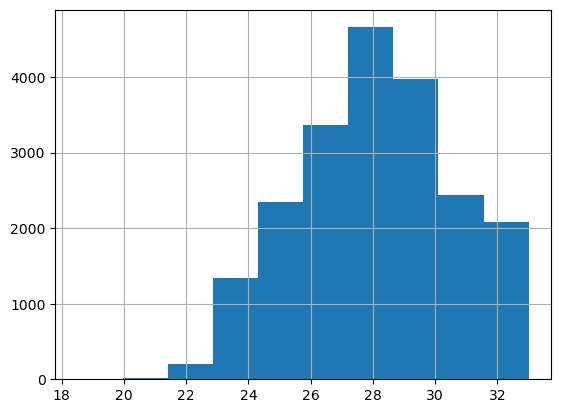

In [23]:
pre_h_df.Target_yeo.hist()

In [24]:
pre_h_df.drop(labels=['median_house_value'], axis=1, inplace=True)

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kfold = KFold(n_splits=10, shuffle=True, random_state=124)
score = cross_val_score(l_r, X_train, y_train, cv=kfold, scoring='r2')
print(score)
print(np.round(np.mean(score), 4))

[ 0.76945952  0.70235458  0.76473656 -0.76785319  0.70814667  0.72852737
  0.61287128  0.72935213  0.72123389  0.73929202]
0.5708


In [27]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 1.6079, RMSE: 1.2680, R2: 0.7486


교차검증 확인 및 예측값 확인 결과, 점수에서 크게 차이가 나는 값들이 있었다.  
추가적인 전처리를 진행

### Cycle 3
- 전체 표준화 적용

In [28]:
std_pre_df = pre_h_df.copy()

In [29]:
from sklearn.preprocessing import StandardScaler

for column in std_pre_df.columns:
    scaler = StandardScaler()
    result = scaler.fit_transform(std_pre_df[column].values.reshape(-1, 1))
    std_pre_df[column] = result

std_pre_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,Target_yeo
0,-1.327063,1.051474,0.982560,-0.803865,-0.970299,-0.973424,-0.976905,2.344844,1.041760,1.717983
1,-1.322072,1.042112,-0.606022,2.041841,1.348077,0.861123,1.670109,2.332314,1.041760,1.263112
2,-1.332054,1.037431,1.856279,-0.535264,-0.825549,-0.819883,-0.843508,1.782662,1.041760,1.228502
3,-1.337044,1.037431,1.856279,-0.623577,-0.718766,-0.765173,-0.733652,0.932756,1.041760,1.168828
4,-1.337044,1.037431,1.856279,-0.462050,-0.611983,-0.758996,-0.629027,-0.013287,1.041760,1.173864
...,...,...,...,...,...,...,...,...,...,...
20423,-0.758111,1.800446,-0.288306,-0.444662,-0.388926,-0.511919,-0.443317,-1.216782,0.071616,-1.407639
20424,-0.818000,1.805127,-0.844309,-0.887602,-0.920467,-0.943422,-1.008293,-0.692138,0.071616,-1.428139
20425,-0.822991,1.777041,-0.923738,-0.175146,-0.125528,-0.368967,-0.173908,-1.143232,0.071616,-1.138909
20426,-0.872899,1.777041,-0.844309,-0.355434,-0.305872,-0.603691,-0.393621,-1.055203,0.071616,-1.277833


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'Target_yeo'}>, <Axes: >, <Axes: >]],
      dtype=object)

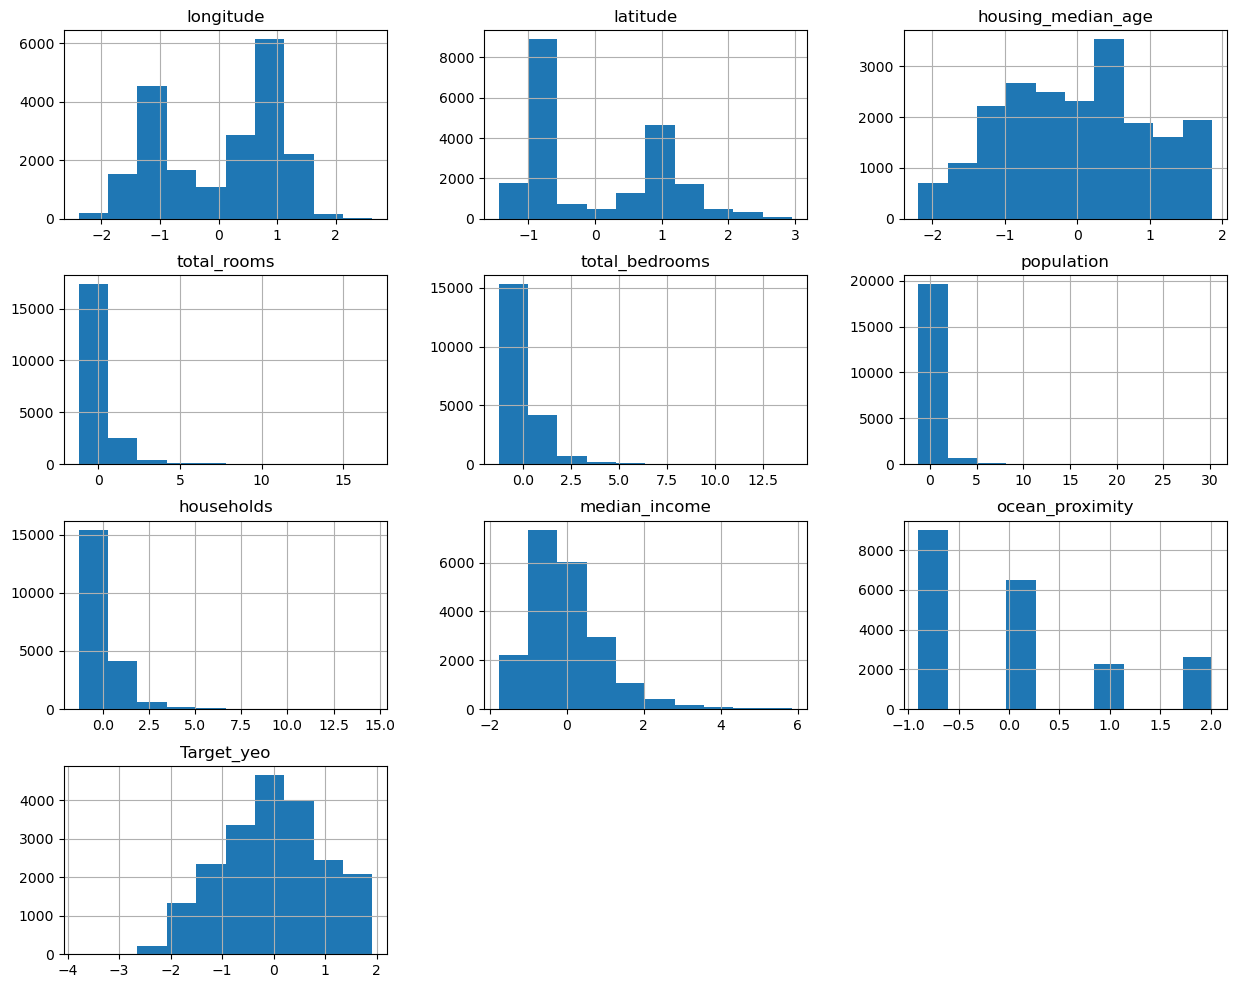

In [30]:
std_pre_df.hist(figsize=(15,12))

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = std_pre_df.iloc[:, :-1], std_pre_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [32]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kfold = KFold(n_splits=10, shuffle=True, random_state=124)
score = cross_val_score(l_r, X_train, y_train, cv=kfold, scoring='r2')
print(score)
print(np.round(np.mean(score), 4))

[ 0.77202985  0.69246951  0.76378232 -1.9841975   0.68871123  0.69596988
  0.61915861  0.73178612  0.72060913  0.74107878]
0.4441


In [33]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.2456, RMSE: 0.4956, R2: 0.7518


점수가 오르긴했지만, 여전히 교차검증에서 안정된 수치가 안나타나고 있는 것을 확인  
OLS, vif를 통해 추가적인 전처리를 진행

### Cycle 4
- scatter plot
- OLS, vif로 다중공산성 확인

In [34]:
std_pre_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,Target_yeo
0,-1.327063,1.051474,0.982560,-0.803865,-0.970299,-0.973424,-0.976905,2.344844,1.041760,1.717983
1,-1.322072,1.042112,-0.606022,2.041841,1.348077,0.861123,1.670109,2.332314,1.041760,1.263112
2,-1.332054,1.037431,1.856279,-0.535264,-0.825549,-0.819883,-0.843508,1.782662,1.041760,1.228502
3,-1.337044,1.037431,1.856279,-0.623577,-0.718766,-0.765173,-0.733652,0.932756,1.041760,1.168828
4,-1.337044,1.037431,1.856279,-0.462050,-0.611983,-0.758996,-0.629027,-0.013287,1.041760,1.173864
...,...,...,...,...,...,...,...,...,...,...
20423,-0.758111,1.800446,-0.288306,-0.444662,-0.388926,-0.511919,-0.443317,-1.216782,0.071616,-1.407639
20424,-0.818000,1.805127,-0.844309,-0.887602,-0.920467,-0.943422,-1.008293,-0.692138,0.071616,-1.428139
20425,-0.822991,1.777041,-0.923738,-0.175146,-0.125528,-0.368967,-0.173908,-1.143232,0.071616,-1.138909
20426,-0.872899,1.777041,-0.844309,-0.355434,-0.305872,-0.603691,-0.393621,-1.055203,0.071616,-1.277833


In [35]:
from statsmodels.api import OLS

features, targets = std_pre_df.iloc[:, :-1], std_pre_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.650
Model:                            OLS   Adj. R-squared (uncentered):              0.650
Method:                 Least Squares   F-statistic:                              4218.
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        10:48:41   Log-Likelihood:                         -18256.
No. Observations:               20428   AIC:                                  3.653e+04
Df Residuals:                   20419   BIC:                                  3.660e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [37]:
get_vif(features)

,vif_score,feature
0,9.069846,longitude
1,8.954824,latitude
2,1.260135,housing_median_age
3,12.811312,total_rooms
4,36.026554,total_bedrooms
5,6.436229,population
6,35.171262,households
7,1.751672,median_income
8,1.112716,ocean_proximity


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

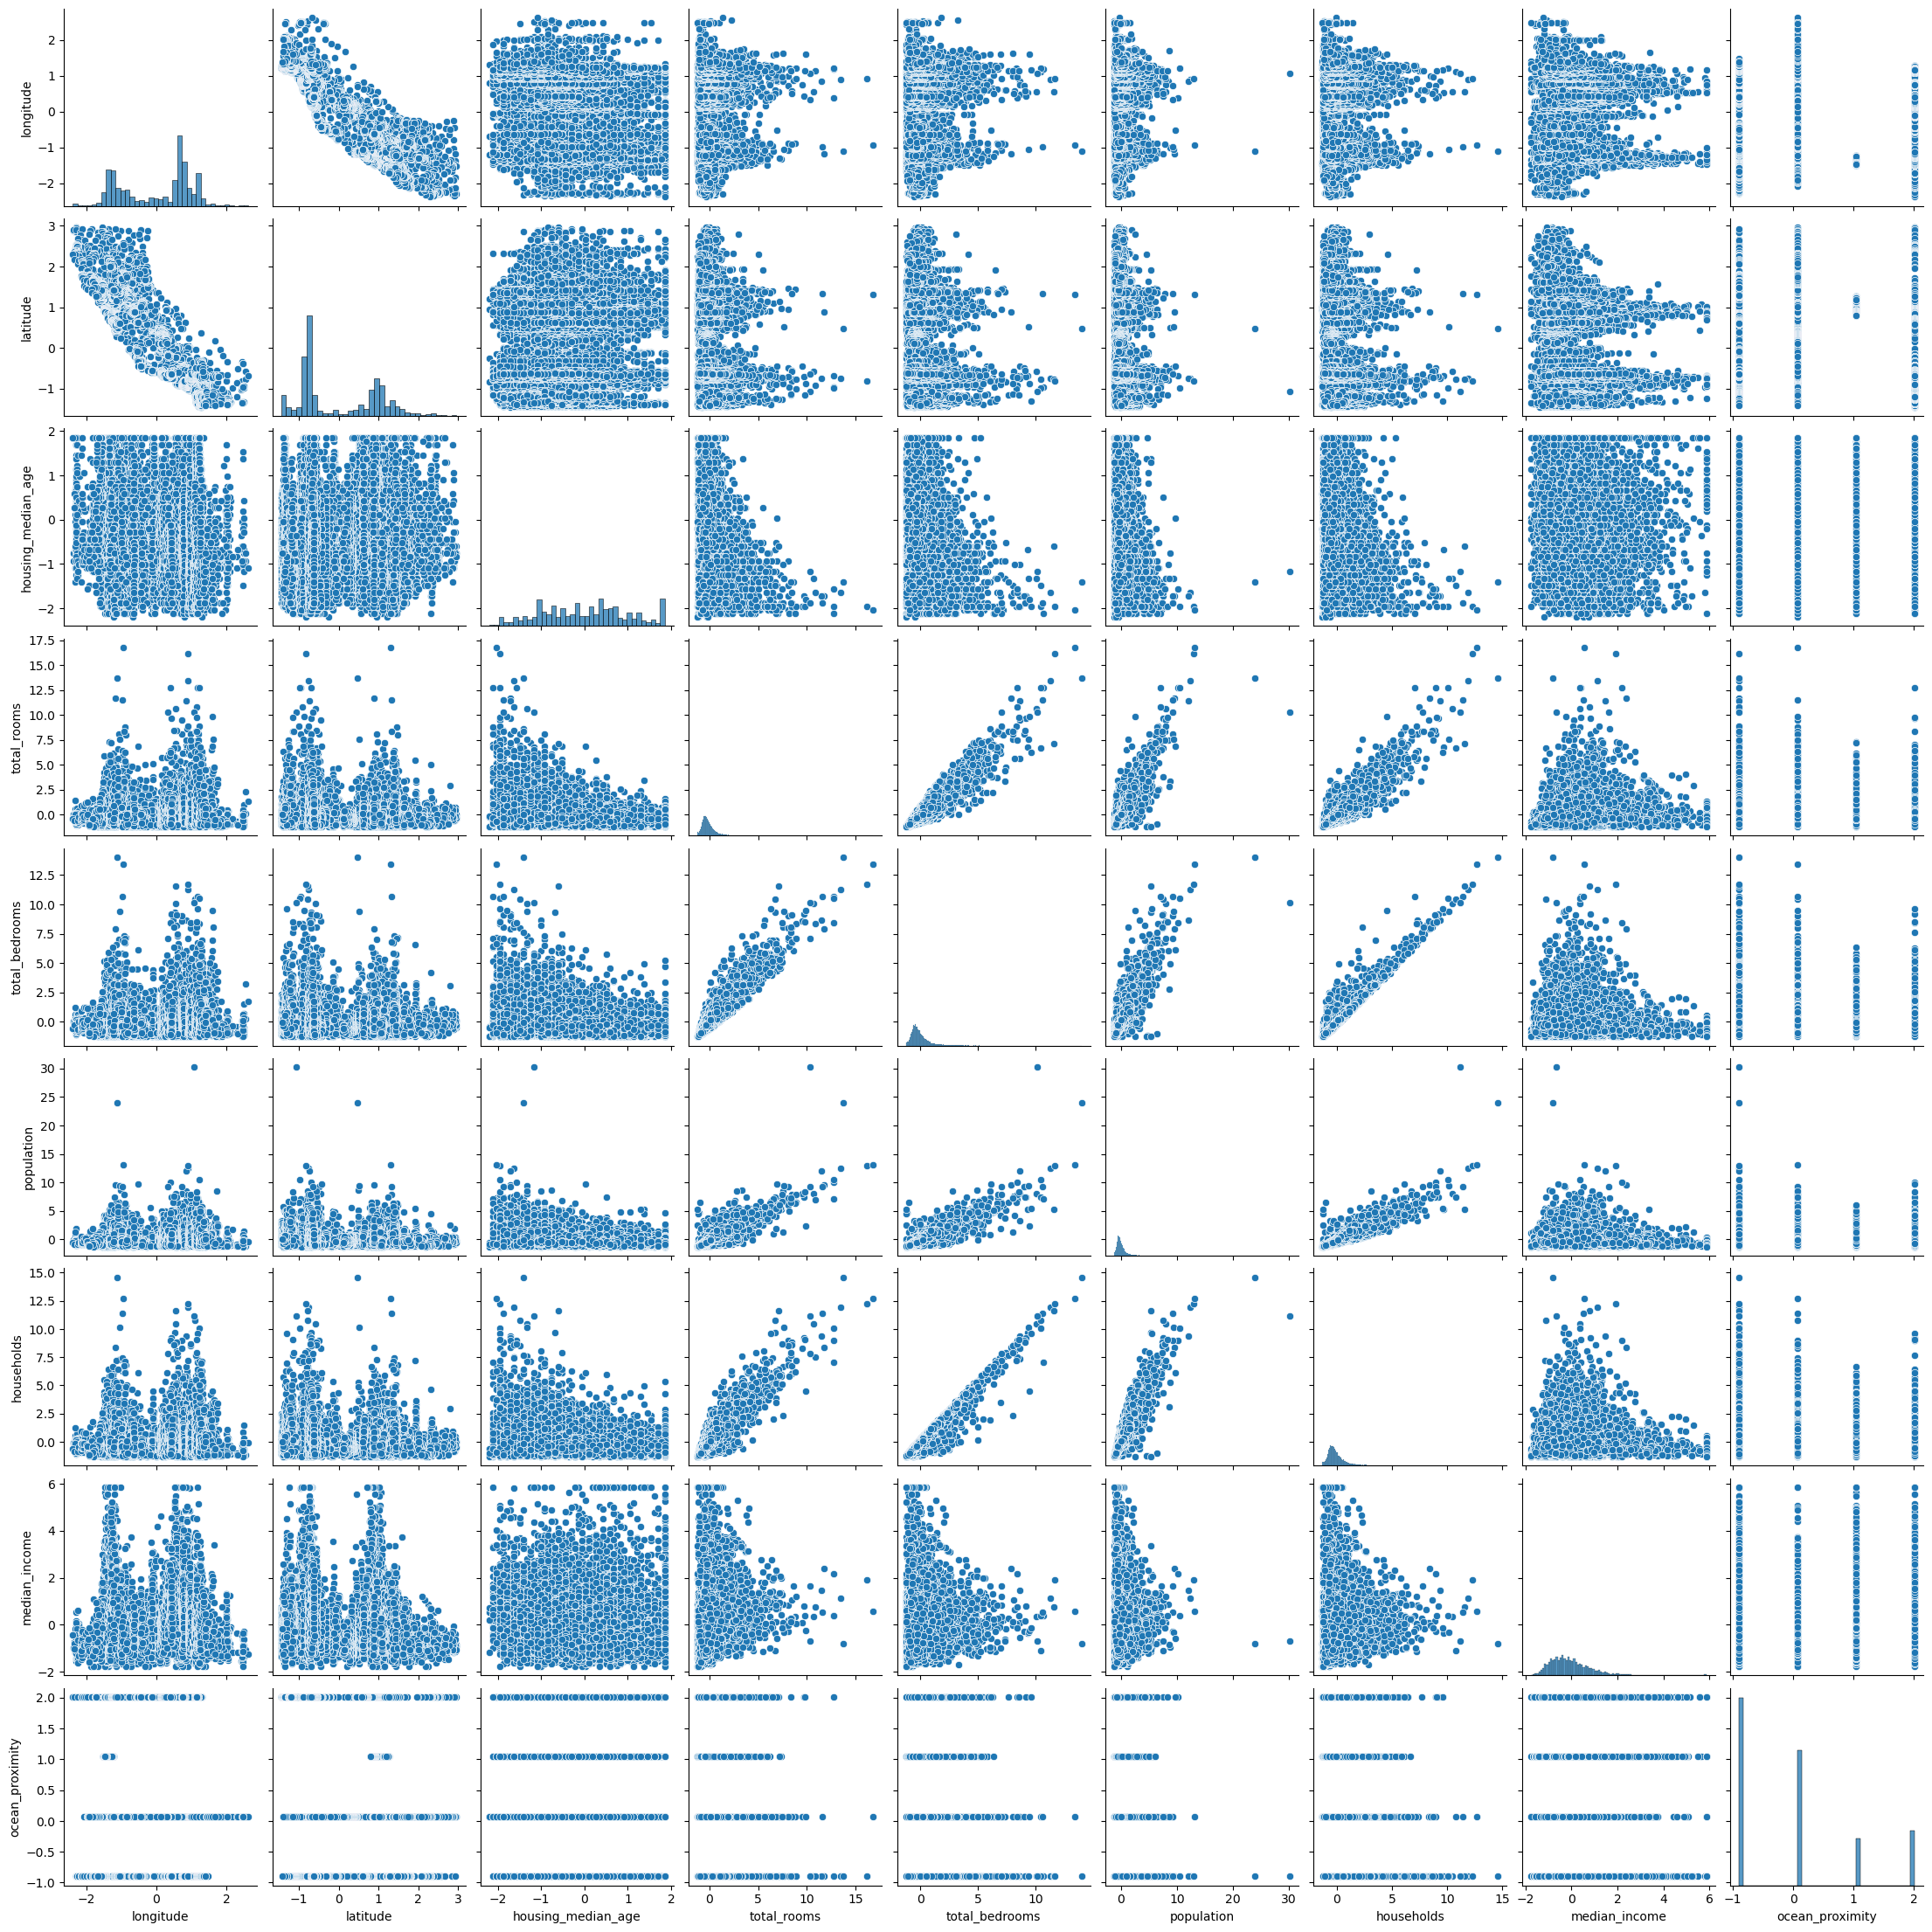

In [38]:
sns.pairplot(features)
plt.show()

In [39]:
get_vif(features.drop(labels=['households', 'total_bedrooms'], axis=1))

,vif_score,feature
0,8.532462,longitude
1,8.430864,latitude
2,1.257608,housing_median_age
3,4.805705,total_rooms
4,4.563348,population
5,1.327741,median_income
6,1.112096,ocean_proximity


In [40]:
std_pre_df = std_pre_df.drop(labels=['households', 'total_bedrooms'], axis=1)
std_pre_df

,longitude,latitude,housing_median_age,total_rooms,population,median_income,ocean_proximity,Target_yeo
0,-1.327063,1.051474,0.982560,-0.803865,-0.973424,2.344844,1.041760,1.717983
1,-1.322072,1.042112,-0.606022,2.041841,0.861123,2.332314,1.041760,1.263112
2,-1.332054,1.037431,1.856279,-0.535264,-0.819883,1.782662,1.041760,1.228502
3,-1.337044,1.037431,1.856279,-0.623577,-0.765173,0.932756,1.041760,1.168828
4,-1.337044,1.037431,1.856279,-0.462050,-0.758996,-0.013287,1.041760,1.173864
...,...,...,...,...,...,...,...,...
20423,-0.758111,1.800446,-0.288306,-0.444662,-0.511919,-1.216782,0.071616,-1.407639
20424,-0.818000,1.805127,-0.844309,-0.887602,-0.943422,-0.692138,0.071616,-1.428139
20425,-0.822991,1.777041,-0.923738,-0.175146,-0.368967,-1.143232,0.071616,-1.138909
20426,-0.872899,1.777041,-0.844309,-0.355434,-0.603691,-1.055203,0.071616,-1.277833


In [41]:
from statsmodels.api import OLS

features, targets = std_pre_df.iloc[:, :-1], std_pre_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.628
Model:                            OLS   Adj. R-squared (uncentered):              0.628
Method:                 Least Squares   F-statistic:                              4935.
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        10:49:59   Log-Likelihood:                         -18873.
No. Observations:               20428   AIC:                                  3.776e+04
Df Residuals:                   20421   BIC:                                  3.782e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = std_pre_df.iloc[:, :-1], std_pre_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [43]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.2775, RMSE: 0.5268, R2: 0.7196


In [44]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kfold = KFold(n_splits=10, shuffle=True, random_state=124)
score = cross_val_score(l_r, X_train, y_train, cv=kfold, scoring='r2')
print(score)
print(np.round(np.mean(score), 4))

[ 0.72708264  0.70108034  0.74091481 -0.4459457   0.70008331  0.41527556
  0.63849543  0.70526228  0.71242817  0.70309361]
0.5598


In [45]:
get_vif(features)

,vif_score,feature
0,8.532462,longitude
1,8.430864,latitude
2,1.257608,housing_median_age
3,4.805705,total_rooms
4,4.563348,population
5,1.327741,median_income
6,1.112096,ocean_proximity


### Cycle 5
- torch를 통해 과적합 검증을 해본다.

In [46]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

features, targets = std_pre_df.iloc[:, :-1], std_pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train_train, X_val_train, y_train_train, y_val_train = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)

X_train_train = torch.FloatTensor(X_train_train.values)
X_val_train = torch.FloatTensor(X_val_train.values)

y_train_train = torch.FloatTensor(y_train_train.values).view(-1,1)
y_val_train = torch.FloatTensor(y_val_train.values).view(-1,1)

In [47]:
X_train_train.shape

torch.Size([13073, 7])

In [48]:
X_train_train.shape

torch.Size([13073, 7])

In [49]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

features, targets = std_pre_df.iloc[:, :-1], std_pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train_train, X_val_train, y_train_train, y_val_train = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)

X_train_train = torch.FloatTensor(X_train_train.values)
X_val_train = torch.FloatTensor(X_val_train.values)

y_train_train = torch.FloatTensor(y_train_train.values).view(-1,1)
y_val_train = torch.FloatTensor(y_val_train.values).view(-1,1)


In [50]:
W_train = torch.zeros((7, 1), requires_grad=True)
b_train = torch.zeros(1, requires_grad=True)

optimizer_train = SGD([W_train, b_train], lr=5e-6)
train_losses= []

epochs = 100000

for epoch in range(1, epochs + 1):
    H_train = X_train_train.matmul(W_train)  + b_train
    train_loss = torch.mean((H_train - y_train_train) ** 2)
    train_losses.append(train_loss.item())

    
    optimizer_train.zero_grad()
    train_loss.backward()
    optimizer_train.step()

    if epoch % 1000 == 0:
        # 모든 W값을 문자열로 만듦
        w_str = ", ".join([f"W{i+1}: {w.item():.4f}" for i, w in enumerate(W_train)])
        
        # 전체 문자열 포맷
        print(f"{epoch}/{epochs}: {w_str}, \nb: {b_train.item():.4f}, loss: {train_loss.item():.4f}")

1000/100000: W1: -0.0002, W2: -0.0019, W3: 0.0008, W4: 0.0016, W5: 0.0001, W6: 0.0067, W7: -0.0001, 
b: -0.0000, loss: 0.9952
2000/100000: W1: -0.0005, W2: -0.0037, W3: 0.0015, W4: 0.0031, W5: 0.0002, W6: 0.0133, W7: -0.0002, 
b: -0.0000, loss: 0.9852
3000/100000: W1: -0.0008, W2: -0.0056, W3: 0.0023, W4: 0.0046, W5: 0.0003, W6: 0.0199, W7: -0.0004, 
b: -0.0001, loss: 0.9754
4000/100000: W1: -0.0010, W2: -0.0074, W3: 0.0030, W4: 0.0060, W5: 0.0004, W6: 0.0263, W7: -0.0005, 
b: -0.0001, loss: 0.9657
5000/100000: W1: -0.0013, W2: -0.0092, W3: 0.0038, W4: 0.0075, W5: 0.0005, W6: 0.0327, W7: -0.0006, 
b: -0.0001, loss: 0.9563
6000/100000: W1: -0.0016, W2: -0.0109, W3: 0.0046, W4: 0.0089, W5: 0.0005, W6: 0.0391, W7: -0.0007, 
b: -0.0001, loss: 0.9471
7000/100000: W1: -0.0020, W2: -0.0127, W3: 0.0054, W4: 0.0103, W5: 0.0006, W6: 0.0454, W7: -0.0007, 
b: -0.0002, loss: 0.9381
8000/100000: W1: -0.0023, W2: -0.0144, W3: 0.0062, W4: 0.0117, W5: 0.0006, W6: 0.0516, W7: -0.0008, 
b: -0.0002, loss:

In [51]:
W_val = torch.zeros((7, 1), requires_grad=True)
b_val = torch.zeros(1, requires_grad=True)

optimizer_val = SGD([W_val, b_val], lr=5e-6)
val_losses = []


epochs = 100000

for epoch in range(1, epochs + 1):
    H_val = X_val_train.matmul(W_val) + b_val
    val_loss = torch.mean((H_val - y_val_train) ** 2)
    val_losses.append(val_loss.item())

    
    optimizer_val.zero_grad()
    val_loss.backward()
    optimizer_val.step()

    if epoch % 1000 == 0:
        # 모든 W값을 문자열로 만듦
        w_str = ", ".join([f"W{i+1}: {w.item():.4f}" for i, w in enumerate(W_val)])
        
        # 전체 문자열 포맷
        print(f"{epoch}/{epochs}: {w_str}, \nb: {b_val.item():.4f}, loss: {val_loss.item():.4f}")

1000/100000: W1: -0.0004, W2: -0.0018, W3: 0.0009, W4: 0.0016, W5: 0.0002, W6: 0.0065, W7: 0.0000, 
b: 0.0000, loss: 0.9810
2000/100000: W1: -0.0008, W2: -0.0037, W3: 0.0019, W4: 0.0031, W5: 0.0003, W6: 0.0129, W7: 0.0000, 
b: 0.0000, loss: 0.9714
3000/100000: W1: -0.0012, W2: -0.0055, W3: 0.0029, W4: 0.0047, W5: 0.0005, W6: 0.0192, W7: 0.0000, 
b: 0.0001, loss: 0.9621
4000/100000: W1: -0.0017, W2: -0.0072, W3: 0.0038, W4: 0.0062, W5: 0.0006, W6: 0.0255, W7: 0.0000, 
b: 0.0001, loss: 0.9529
5000/100000: W1: -0.0021, W2: -0.0090, W3: 0.0048, W4: 0.0076, W5: 0.0007, W6: 0.0317, W7: 0.0001, 
b: 0.0001, loss: 0.9439
6000/100000: W1: -0.0025, W2: -0.0107, W3: 0.0058, W4: 0.0091, W5: 0.0008, W6: 0.0378, W7: 0.0001, 
b: 0.0001, loss: 0.9351
7000/100000: W1: -0.0030, W2: -0.0125, W3: 0.0067, W4: 0.0105, W5: 0.0009, W6: 0.0439, W7: 0.0001, 
b: 0.0002, loss: 0.9265
8000/100000: W1: -0.0035, W2: -0.0142, W3: 0.0077, W4: 0.0119, W5: 0.0009, W6: 0.0499, W7: 0.0002, 
b: 0.0002, loss: 0.9180
9000/100

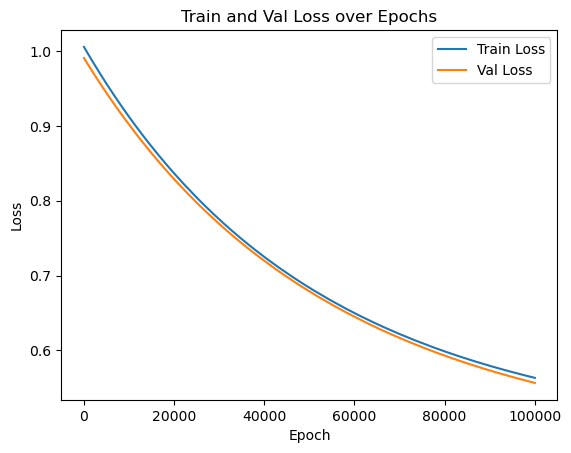

In [52]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Val Loss over Epochs')
plt.legend()
plt.show()

검증 결과, Loss 값이 fit하게 나타남을 알 수 있다.  
이 뜻은, 훈련 데이터와 검증데이터를 통해 확인을 했을 때 과적합이나 과소적합되지 않았다고 판단할 수 있다.

### Cycle 6
- Pytorch로 확인한 결과, 안정적으로 학습된다는 것을 알 수 있엇기에, sklearn으로 학습을 다시 진행한다.

In [53]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = std_pre_df.iloc[:, :-1], std_pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [54]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.3639, RMSE: 0.6033, R2: 0.6323


MSE: 0.3735, RMSE: 0.6111, R2: 0.6275


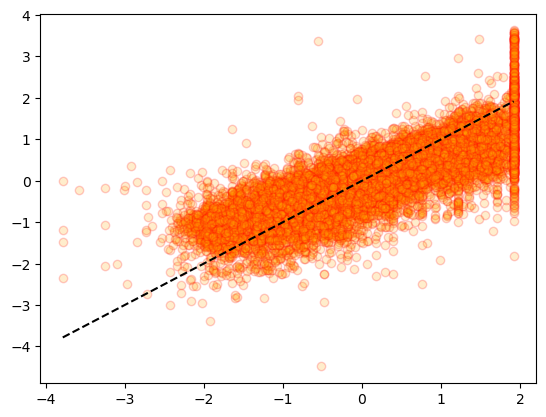

In [55]:
# train 데이터 확인
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 0.3639, RMSE: 0.6033, R2: 0.6323


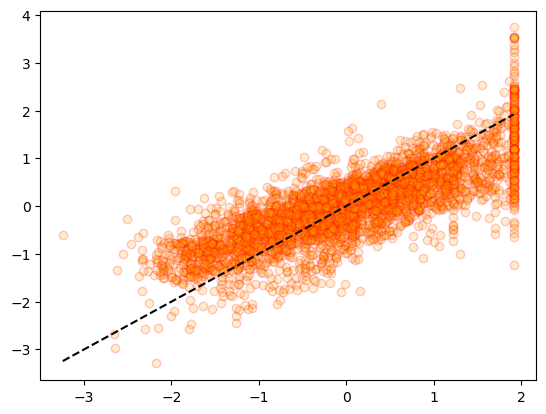

In [56]:
# test 데이터 확인
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = std_pre_df.iloc[:, :-1], std_pre_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [58]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.2775, RMSE: 0.5268, R2: 0.7196


MSE: 0.2751, RMSE: 0.5245, R2: 0.7256


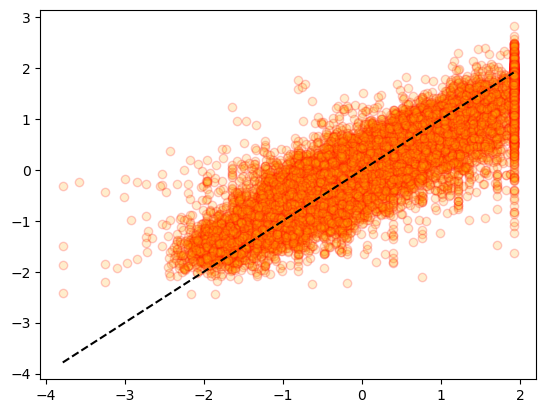

In [59]:
# train 데이터 확인
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 0.2775, RMSE: 0.5268, R2: 0.7196


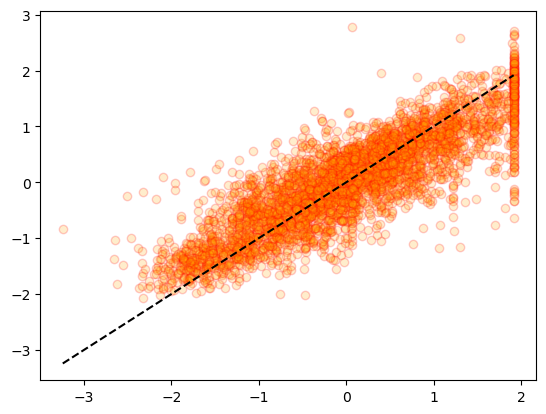

In [60]:
# test 데이터 확인
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

### 결론
- 먼저 데이터를 학습시키기 위해 최소한의 전처리과정만 거친 후, 훈련 시킨 다음 이 데이터가 선형인지 비선형인지 확인하였다.
- corr점수가 가장 높이 나온 feature를 타겟 데이터와 scatter를 그려서 확인한 결과 이 데이터는 선형데이터에 가깝다는 판단을 했다.

<img src='./images/scatter01.png' width='500px'>

- Vif를 통해 다중공산성의 문제가 발생한다는 사실을 확인 후 이를 제거해주면서 R2 Score가 떨어지는 것을 확인했고, 이를 위해 feature를 제거함과 동시에 타겟데이터의 분포를 PowerTransform을 통해 분포를 맞춰주는 작업을 해주어 R2 Score를 다시 올려주었다.
- 또한, 과적합을 판단하기 위해, 훈련 데이터를 다시 검증데이터와 훈련데이터로 분리한 다음 각각 Pytorch로 학습을 시켰다.
- 각각 loss value를 list에 담고 그래프를 그려서 확인했을 때 다음과 같았다.

<img src='./images/Train_Val_loss_graph.png' width='500px'>

- 그래프를 확인한 결과 fit하게 나타났고 이는 과적합이나 과소적합이 발생하지 않았다라고 판단할 수 있었다.
- Polynomial을 사용하지 않고 linear모델에 학습한 결과 R2 score가 0.61에 가까웠지만,
- Polynomial degree를 3을 주고 학습하였을 때 R2 score가 0.72까지 올라온 것을 알 수 있었다.


**degree=1**
<div style='display: flex'>
    train  
    <img src='./images/degree1_train_scatter.png', width='500px'>
    test
    <img src='./images/degree1_test_scatter.png', width='500px'>
</div>


**degree=3**
<div style='display: flex'>
    train
    <img src='./images/degree3_train_scatter.png', width='500px'>
    test
    <img src='./images/degree3_test_scatter.png', width='500px'>
</div>
